C:\Users\KIIT\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5133 - loss: 0.6939 - val_accuracy: 0.5724 - val_loss: 0.6738
Epoch 2/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.5844 - loss: 0.6685 - val_accuracy: 0.5912 - val_loss: 0.6729
Epoch 3/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6089 - loss: 0.6608 - val_accuracy: 0.5968 - val_loss: 0.6723
Epoch 4/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6330 - loss: 0.6399 - val_accuracy: 0.6247 - val_loss: 0.6533
Epoch 5/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6660 - loss: 0.6072 - val_accuracy: 0.6281 - val_loss: 0.6499
Epoch 6/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6933 - loss: 0.5886 - val_accuracy: 0.6365 - val_loss: 0.6460
Epoch 7/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7066 - loss: 0.5575 - val_accuracy: 0.6212 - val_loss: 0.6964
Epoch 8/15
180/180 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7391 - loss: 0.5233 - val_accu

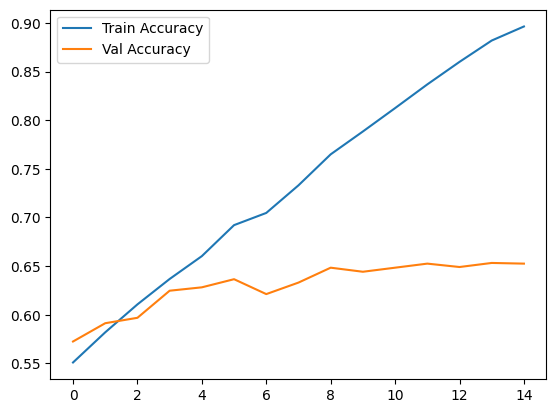

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical

DATASET_PATH = "dataset"
CATEGORIES = ["Not_stressed", "Stressed"]

data = []
labels = []
for category in CATEGORIES:
    path = os.path.join(DATASET_PATH, category)
    label = CATEGORIES.index(category)

    for img_name in os.listdir(path):
        img_path = os.path.join(path, img_name)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if img is not None:
            img = cv2.resize(img, (48, 48))
            data.append(img)
            labels.append(label)

X = np.array(data).reshape(-1, 48, 48, 1) / 255.0
y = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# CNN Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(48,48,1)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train, y_train,
    epochs=15,
    batch_size=32,
    validation_data=(X_test, y_test)
)
os.makedirs("model", exist_ok=True)
model.save("model/stress_model.h5")
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.show()